과제3: 정규분포 난수로 히스토그램 만들기 (팬시 인덱싱과 브로드캐스팅 활용)
목표: 난수를 생성하고, 직접 구간에 속하는 인덱스를 계산하여 히스토그램을 생성. np.searchsorted를 사용하지 않고 각 값이 어느 구간에 속하는지 확인.

구현 순서:

1. 난수 생성:

평균이 0, 표준편차가 1인 정규분포에서 난수 10,000개를 생성하여 data 배열에 저장.

2. 구간 설정:

-10에서 10까지 20개의 구간을 균등하게 나누어 bins 배열.
이 구간들은 히스토그램의 각 구간 경계.

3. 구간 인덱스 계산:

data의 각 값이 어느 구간에 속하는지 직접 계산하여 구간 인덱스 배열 indices에 저장.
예를 들어, data의 값이 특정 구간에 속하면 indices 배열에 그 구간 인덱스를 기록합니다.
이 과정에서 브로드캐스팅과 팬시 인덱싱을 활용하여 효율적으로 구간 인덱스를 계산.

4. 누적 카운팅:

구한 indices 값을 사용하여, 각 구간별로 카운트를 계산.
팬시 인덱싱을 통해 indices에 해당하는 counts 위치에 1씩 누적.

5. 결과 시각화:

구간별 빈도수를 그래프로 시각화하여 히스토그램.
bins와 counts를 사용하여 히스토그램이 올바르게 그려졌는지 확인.

1. 난수 생성:

In [64]:
import numpy as np
rng = np.random.default_rng()
x = rng.normal(size=10000)
print(x)

[ 1.6583135  -0.25294466  0.06581359 ...  2.08684856  1.44756857
  1.65986505]


(array([2.400e+01, 1.990e+02, 9.440e+02, 2.330e+03, 3.129e+03, 2.262e+03,
        9.080e+02, 1.870e+02, 1.600e+01, 1.000e+00]),
 array([-3.57295002, -2.78083264, -1.98871525, -1.19659787, -0.40448048,
         0.3876369 ,  1.17975429,  1.97187167,  2.76398905,  3.55610644,
         4.34822382]),
 <BarContainer object of 10 artists>)

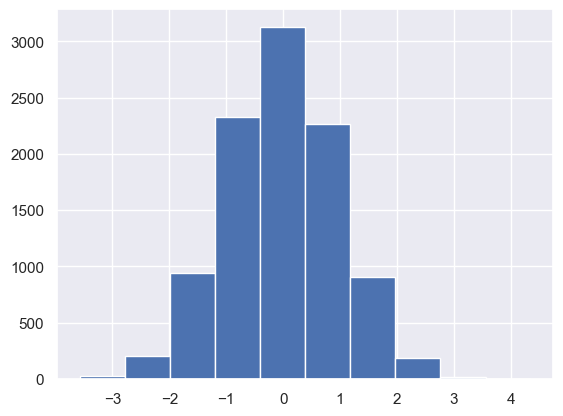

In [65]:
plt.hist(x)

2. 구간 설정:

In [66]:
bins = np.linspace(-10,10,20)
bins

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

3. 구간 인덱스 계산:

In [67]:
indices = [i+1 for j in range(len(x)) for i in range(len(bins)-1) if bins[i] < x[j] < bins[i+1] ]
print(indices)

[12, 10, 10, 9, 9, 9, 11, 9, 10, 9, 11, 11, 11, 10, 9, 10, 9, 10, 10, 10, 9, 11, 12, 10, 12, 10, 10, 10, 10, 10, 10, 9, 9, 10, 10, 11, 9, 11, 11, 8, 10, 10, 10, 11, 10, 8, 10, 11, 10, 11, 9, 11, 10, 11, 9, 10, 10, 11, 11, 11, 11, 9, 11, 10, 10, 10, 11, 10, 9, 10, 9, 10, 9, 10, 10, 9, 11, 10, 11, 10, 8, 8, 11, 9, 8, 11, 10, 10, 10, 11, 8, 11, 9, 10, 10, 10, 10, 10, 11, 10, 10, 12, 9, 10, 10, 9, 9, 9, 10, 9, 9, 11, 10, 10, 8, 9, 11, 9, 10, 9, 9, 10, 11, 11, 10, 10, 9, 9, 9, 10, 10, 10, 9, 9, 11, 9, 9, 11, 11, 12, 10, 10, 12, 10, 11, 12, 12, 10, 10, 10, 8, 8, 10, 12, 9, 9, 12, 9, 10, 10, 9, 11, 11, 11, 11, 12, 10, 11, 10, 9, 11, 10, 11, 10, 12, 9, 10, 10, 9, 10, 11, 9, 9, 8, 11, 10, 11, 11, 9, 10, 10, 9, 11, 11, 10, 11, 9, 11, 10, 10, 10, 10, 10, 11, 10, 12, 9, 10, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 10, 10, 9, 10, 9, 11, 11, 9, 11, 10, 10, 9, 11, 9, 9, 10, 9, 9, 9, 11, 12, 11, 10, 10, 10, 11, 12, 9, 10, 10, 9, 10, 11, 10, 10, 9, 12, 10, 10, 11, 10, 11, 10, 10, 9, 9, 11, 9, 10, 9, 10, 11

In [68]:
bins_range = np.array([bins[:-1],bins[1:]])
bins_range.shape

(2, 19)

4. 누적 카운팅:

In [69]:
counts = np.zeros_like(bins)
np.add.at(counts, indices, 1)
counts

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 3.300e+01, 5.260e+02, 2.494e+03, 4.054e+03, 2.386e+03,
       4.760e+02, 3.000e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00])

5. 결과 시각화:

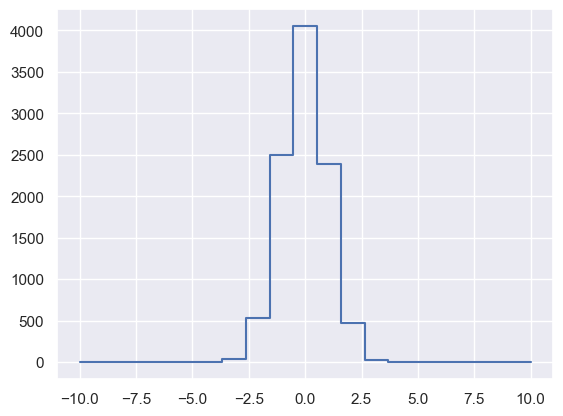

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.plot(bins, counts, drawstyle='steps')